In [12]:
import pandas as pd
import os
import matplotlib 
from sklearn.model_selection import train_test_split
#Sometimes, pyplot doesn't work if you don't import matplotlib
import matplotlib.pyplot as plt, matplotlib.image as mpimg

# Background on SVM

> Based on UC Berkeley Machine Learning Course

### Example Dataset:  MNIST

Given a set of images, each image is a handwritten number from 0 to 9, the goal is to categorize each image into 10 bins, each corresponding to a digit.



#### Loading the Data

We use panda's read_csv to read train.csv into a [dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).


In [9]:
train_set_location = os.path.join(os.getcwd(), \
                                   "data", "train.csv")
test_set_location = os.path.join(os.getcwd(), \
                                 "data", "test.csv")

At this point, we are loading csv file into a panda dataframe.  The first column of csv file is label and the rest of the columns represent the pixels of that image.

Note [0:5000] is for getting the first 5000 rows and [1:] is getting all the column values other than first column.

We then apply provided function to separate the two csv into separate frames: train images, train_labels, test_images, test_labels.

In [14]:
labeled_images = pd.read_csv(train_set_location)
images = labeled_images.iloc[0:5000, 1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels \
    = train_test_split(images, labels, train_size=0.8, \
                       random_state=0)

/home/karen/anaconda3/envs/MNIST/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Viewing the Image
- To view this image in matplotlib, we need to [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) into a $28 \times 28$ matrix.
- Note there are 784 columns representing the pixels

Note the dimension of each image is (784,)


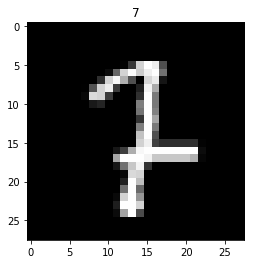

In [21]:
image_index = 0 # We will read the 0th data entry
img = train_images.iloc[image_index].as_matrix()

print("Note the dimension of each image is " + str(img.shape))

# We will reshape img into 28 x 28 matrix
img = img.reshape((28, 28))

# Showing the image
plt.imshow(img, cmap='gray') 
plt.show()
plt.title(train_labels.iloc[image_index, 0])

### So, what is the work flow?
A typical ML program involves two functions: 
- train(train_dataset, train_label)
- predict(test_dataset, learned_parameter)

Train will take train_dataset, train_label and return a decision mechanism (usually an array of parameters).  So with the prediction fuction, given a test_dataset, it will return the labels.  

Finally, we will compare the returned label with test label to calculate the frequency of correct labels.

## The Math behind SVM

### Problem Premise

Support vector machine is a supervised model that is designed to solve **classification problems.**  Generally, the dataset is in the following form:

$$(x_i, y_i) \text{ where } x_i \in \mathbb{R}^m, y_i \in \mathbb{R}^{k}$$

where *m*  is the number of features and *k* is the number of resulting classes.




#### Using Hyperplane as a classifier

From the previous section, we know that each image can be represented as a vector $v \in \mathbb{R}^m$, where $m$ in this case is $784$.

Hence we can represent $v$ as a point in $m$ dimensional space.  (i.e. Note how $(1, 1) \in \mathbb{R}^2$ represents a point on a 2 dimensional cartesian plan.)

In this problem, we need to classify the images into 10 categories.  Let's first consider a simpler problem, in which we only need to separate the images into two categories: $0$ or not $0$.

Since every image can be represented as a $m$ dimensional point, one intuitional classifier is to draw a "line" in the vector space $\mathbb{R}^{m}$, such that every value above $v$ will be classified as $0$ and every value below $v$ will be classified as not $0$.  Such "line" is a hyperplane with dimension $n-1$.

In two-dimensional case, the "line" can be represented as :

![svc](svc.png)

From linear algebra, a hyperplane of $m-1$ dimension in $m$ dimensional vector space can be represented as

$$\{x \in \mathbb{R}^m | c^Tx + b = 0 \}$$
where $b$ is plane's translation from the origin and $c$ is the vector perpendicular to that hyperplane.


*Prove that $x' \in \mathbb{R}$ is "above" the hyperplane, iff $c^Tx + b > 0$*.

*Above means point is to the right and above of all points on the plane*




Since $x' \in \mathbb{R}$ is "above" the hyperplane, iff $c^Tx + b > 0$ and is "under" the hyperplane, iff $c^Tx + b < 0$.  We have a crude classifier.



### How do we know if the classifier is a good classifier?

The objective of a good classifier is simple:  correct and efficient.  At this point, we will focus on the correctness of the classifier.

Built on top of our crude classifier we will define the following prediction function.

```python

pred(x):
   if c^Tx + b > 0:
       return 1
    return -1
```



### Margins

**Margins** is the distance between the closest data point and the hyperplane.  

The **Loss Function** of Support Vector Machine aims to maximize the correctness of classification and maximize the margin.  

### Hinge Loss

We will define **Hinge Loss** as 

$$\max(0, 1 - yf(x))$$

given $f(x)$ is $pred(x)$ for the SVM prediction function.  This will ensure mislabeled value to receive a positive loss.  


For general case, our loss function will be 

$$L = \sum_{i=1}^n \max(0, 1 - y_if(x_i))$$

given n points.  

$$ \newcommand{\norm}[1]{\left\lVert#1\right\rVert} $$

We assumed so far that $f(x) = c^Tx + b$ with $\norm{c}_2 = 1$.  Note on the same plane, larger $c$ value will force small $x$ in order to keep $1 - y_if(x_i)$ to be small. Hence, smaller $c$ will have a much larger room for errors. (What happens if $y_i = 1$ and $f(x_i) = -10$ vs $f(x_i) = -1$ and Adding a regularization term $\lambda \norm{c}^2$ will allow the classifier to be more lenient.  This is **Soft margin SVM**.

#### Training using sckitlearn

In [22]:
from sklearn import svm
%matplotlib inline

In [24]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.10000000000000001

/home/karen/anaconda3/envs/MNIST/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/karen/anaconda3/envs/MNIST/lib/python3.5/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/home/karen/anaconda3/envs/MNIST/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

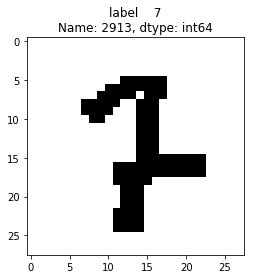

In [27]:
i=0
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

In [28]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)



0.88700000000000001

In [30]:
test_data=pd.read_csv(test_set_location)
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])



### Interesting Questions:

- Why is large margin better than smaller?
    - large margin is more likely to correctly classify new data
    - think margin as confidence (can we treat margin as confidence in a statistical setting?), when a new point comes, (assume it is close to the points of same category), it is less likely to be misclassified
    - 

## Multiclass SVM

### One vs Rest
$$\DeclareMathOperator*{\argmax}{arg\,max}$$
For $k$ classes, we construct $k$ functions $f_i(x)$ for $i = 1, \cdots, k$, designed to estimate the probability for $x$ is in class $i$.

We train $f_i(x)$ with labeled data:  $y = 1$ if $x \in C$ and $y = 0$ if $x$ is in any other class.  The predicted class label for $x$ is

$$\argmax_i f_i(x)$$

#### Margin in One vs Rest

In multiclass case, **margin** is defined as 

$$f_y(x) - f_j(x) \geq 1$$

where $y$ is the correct label class corresponding to $x$, and $j$ is any other class

So, loss is defined as 
$$\max(0, 1 - (f_y(x) - f_j(x)))$$

for one case, the total loss is

$$l = \sum_{j \neq y} \max\big(0, 1 - f_y(x) + f_j(x)\big)$$
### One vs One

For $k$ classes, we construct $\binom{k}{2}$ functions $f_{ij}(x)$ with $i < j \in \{1, \cdots, k\}$  Each $f_{i,j}(x)$ is a binary classifier for class $i$ and class $j$, and is trianedon those classes.  For a new instance $x$, tally the vote from all $\binom{k}{2}$ classifiers.  Outputs the class with highest votes.

